## Eval GWAS QQ Plot

In [1]:
from os import path
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-paper')

In [2]:
DATA_DIR = path.join(path.pardir, 'data')
PAN_DIR = path.join(DATA_DIR, 'pangenomes')
FIG_DIR = path.join(path.pardir, 'figs')

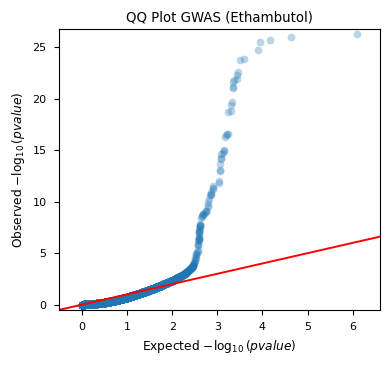

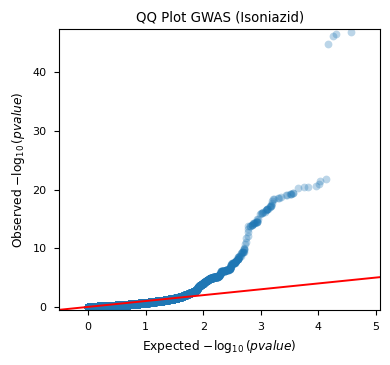

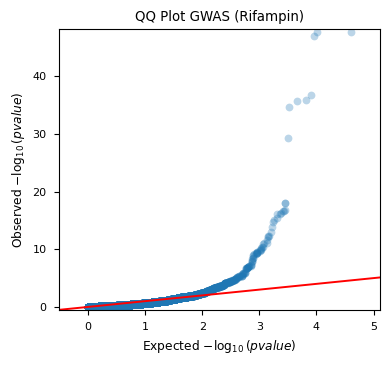

In [8]:
def plot_savefig_qq(antibiotic):
    m = pd.read_csv(path.join(PAN_DIR, antibiotic, 'pyseer', 'pyseer.tsv'), sep='\t', usecols=['lrt-pvalue'])['lrt-pvalue']

    y = -np.log10(m)
    x = -np.log10(np.random.uniform(0, 1, m.shape[0]))

    # check for statsmodels version (issue #212)
    old_stats = False
    try:
        vmajor, vminor = statsmodels.__version__.split('.')[:2]
        if int(vmajor) == 0 and int(vminor) < 13:
            old_stats = True
        else:
            old_stats = False
    except:
        pass

    if old_stats:
        xx = y
        yy = x
    else:
        xx = x
        yy = y
    
    plt.figure(figsize=(4, 3.75))
    ax = plt.subplot(111)

    fig = sm.qqplot_2samples(
        xx,
        yy,
        xlabel='Expected $-\log_{10}(pvalue)$',
        ylabel='Observed $-\log_{10}(pvalue)$',
        line='45',
        ax=ax
    )

    ax = fig.axes[0]
    ax.lines[0].set_color('k')
    ax.lines[0].set_alpha(0.3)

    ax.set_xlim(-0.5, x.max()+0.5)
    ax.set_ylim(-0.5, y.max()+0.5)

    ax.set_title(f'QQ Plot GWAS ({antibiotic.title()})')
    plt.tight_layout()

    plt.savefig(path.join(FIG_DIR, f'qq_{antibiotic}.png'), dpi=400)
    plt.show()
    
    
antibiotics = ['ethambutol', 'isoniazid', 'rifampin']
for a in antibiotics:
    plot_savefig_qq(a)